<a href="https://colab.research.google.com/github/vaibhav19128/Predictive-Modelling-for-ClickThrough-Rate-Optimization-at-Connect-Sphere-Digital/blob/main/DecisionTreeAndRandomForest10thNov2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Theory: https://miro.com/welcomeonboard/bjdFVkRCb2lpK1Z1MVNuSzh5WWRMand4SStFSElLSkdNT0FJZEpiWVFtWW12TEtVL0QyVHl3M1U5dVc1di9TOVZjL2dJb2N6ZnNNM1FoYnFwWDlYbFVpNFBBQTJCSlNYZzdicHdESUZMUUlNalpFNEowZEo2bDN1UlgzM0lybnB0R2lncW1vRmFBVnlLcVJzTmdFdlNRPT0hdjE=?share_link_id=617352757387

Dataset Link: https://drive.google.com/file/d/1haLnnbt5nWY_qXjg7oJbO3ztrDaToylO/view?usp=sharing

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/customer_churn.csv')

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Insights**
* Almost all columns are of object data type
* There are some columns that seems to look like numeric column but actually they are object

In [ ]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
df.describe(include='O').T

,count,unique,top,freq
customerID,7043,7043,3186-AJIEK,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


In [ ]:
# df['TotalCharges'].astype(float)

**In Total Charges column there are some white spaces `' '`**

That is why we are getting

**`ValueError: could not convert string to float: ' '`**


In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')
# errors = 'coerce' --> It convers the error into null value

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
# x = '10'
# print(type(int(x)))
# y = 'abc'
# type(int(y))


**We will drop the null values**

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.drop(columns =['customerID'],inplace=True)

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


###**Data Preprocessing**
We will now encode the data

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
for col in df.columns:
  if df[col].dtype =='object':
    df[col] = le.fit_transform(df[col])
    mapping = dict(zip(le.classes_,le.transform(le.classes_)))
    print(f'Column: {col}')
    print(f'Original ----> Encoded')
    for orig,enc in mapping.items():
      print(f'{orig} ----> {enc}')
    print()

Column: gender
Original ----> Encoded
Female ----> 0
Male ----> 1

Column: Partner
Original ----> Encoded
No ----> 0
Yes ----> 1

Column: Dependents
Original ----> Encoded
No ----> 0
Yes ----> 1

Column: PhoneService
Original ----> Encoded
No ----> 0
Yes ----> 1

Column: MultipleLines
Original ----> Encoded
No ----> 0
No phone service ----> 1
Yes ----> 2

Column: InternetService
Original ----> Encoded
DSL ----> 0
Fiber optic ----> 1
No ----> 2

Column: OnlineSecurity
Original ----> Encoded
No ----> 0
No internet service ----> 1
Yes ----> 2

Column: OnlineBackup
Original ----> Encoded
No ----> 0
No internet service ----> 1
Yes ----> 2

Column: DeviceProtection
Original ----> Encoded
No ----> 0
No internet service ----> 1
Yes ----> 2

Column: TechSupport
Original ----> Encoded
No ----> 0
No internet service ----> 1
Yes ----> 2

Column: StreamingTV
Original ----> Encoded
No ----> 0
No internet service ----> 1
Yes ----> 2

Column: StreamingMovies
Original ----> Encoded
No ----> 0
No intern

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   int64  
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   int64  
 3   Dependents        7032 non-null   int64  
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   int64  
 6   MultipleLines     7032 non-null   int64  
 7   InternetService   7032 non-null   int64  
 8   OnlineSecurity    7032 non-null   int64  
 9   OnlineBackup      7032 non-null   int64  
 10  DeviceProtection  7032 non-null   int64  
 11  TechSupport       7032 non-null   int64  
 12  StreamingTV       7032 non-null   int64  
 13  StreamingMovies   7032 non-null   int64  
 14  Contract          7032 non-null   int64  
 15  PaperlessBilling  7032 non-null   int64  
 16  PaymentMethod     7032 non-null   int64  
 17  

###**Analysis**

In [ ]:
df.Churn.value_counts(normalize = True)*100

,proportion
Churn,
0,73.421502
1,26.578498


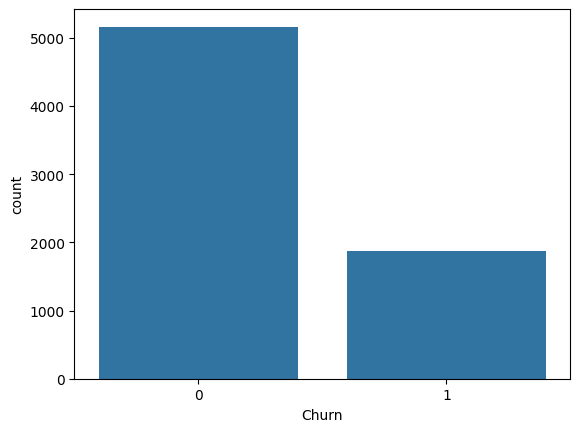

In [ ]:
sns.countplot(data=df,x='Churn')
plt.show()

In [ ]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

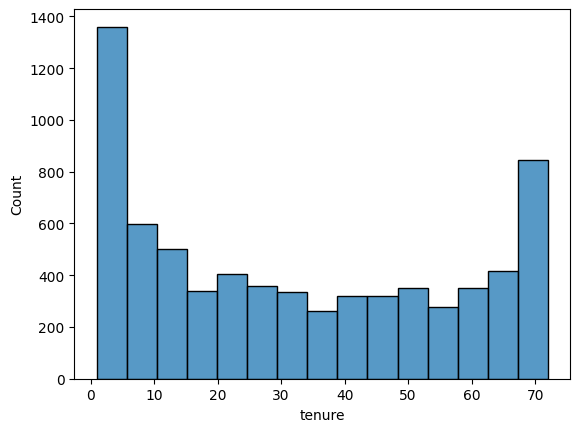

In [ ]:
sns.histplot(data=df,x='tenure')
plt.show()

In [ ]:
df['tenure'].skew() # +ve ---> Right skewed

np.float64(0.23773083190513133)

In [ ]:
df['tenure'].kurt() # Platykurtic

np.float64(-1.3878225795553585)

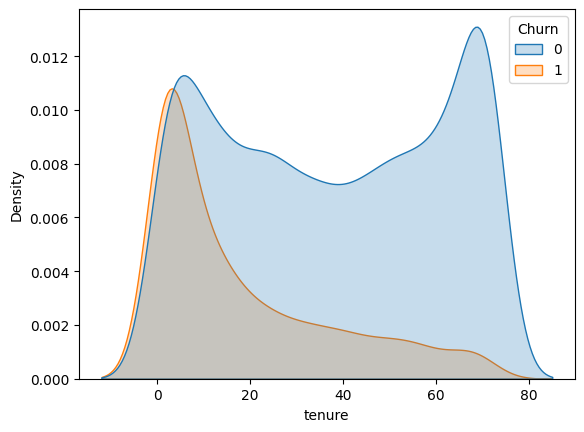

In [ ]:
sns.kdeplot(data=df,x='tenure',fill=True,hue='Churn')
plt.show()

**Analysis**
* Most Churn happens early - Customer in their first few month are more likely to leave
* Long-Time Customers rarerly churns - Loyality increase with tenure

**Graph of Monthly Charges vs Churn**

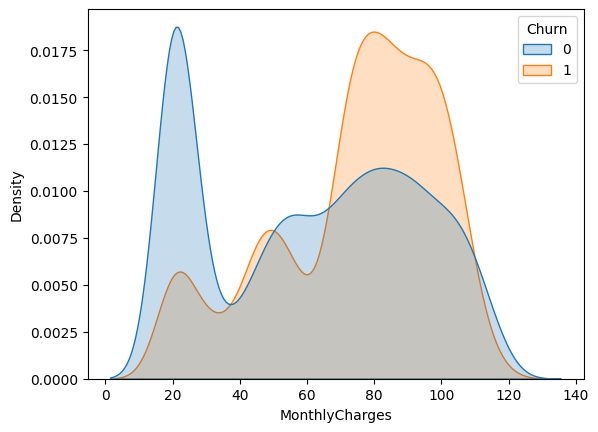

In [ ]:
sns.kdeplot(data=df,x='MonthlyCharges',hue='Churn',common_norm=False,fill=True)
plt.show()

**High monthly bills are related to churn**

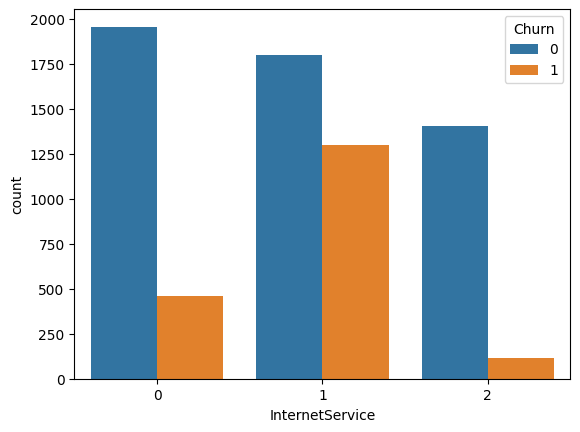

In [ ]:
sns.countplot(data=df,x='InternetService',hue='Churn')
plt.show()

**most of the people who chose fiber optics are churning, need to check the services**

**Let's Split the data for model building**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x = df.drop(['Churn'],axis = 1)
y = df['Churn']

In [ ]:
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60


In [ ]:
y

,Churn
0,0
1,0
2,1
3,0
4,1
...,...
7038,0
7039,0
7040,0
7041,1


In [ ]:
x_train ,x_test, y_train,y_test = train_test_split(x,y,train_size=0.7,random_state=42)

In [ ]:
x_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
3946,0,0,0,0,9,0,1,0,2,0,2,2,2,2,0,0,3,58.50,539.85
3394,1,0,0,0,26,1,2,0,2,2,0,0,0,0,1,0,2,61.55,1581.95
1635,0,0,0,0,3,1,0,0,0,0,2,0,2,2,1,1,2,69.95,220.45
4088,1,0,0,0,7,1,2,1,0,0,0,0,0,0,0,0,2,73.60,520.00
1886,1,0,1,1,67,1,0,0,2,0,2,2,0,0,2,1,0,60.40,3953.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3778,1,0,0,0,3,1,2,0,0,0,0,0,0,0,0,0,0,50.40,137.25
5199,0,0,0,0,51,1,2,1,0,2,2,2,2,2,1,1,2,111.50,5703.25
5235,1,0,0,0,9,1,2,1,2,0,0,0,0,0,0,1,2,81.15,784.45
5399,0,0,0,0,50,1,0,2,1,1,1,1,1,1,1,0,0,19.75,989.05


In [ ]:
x_test

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2481,1,1,1,0,61,1,2,2,1,1,1,1,1,1,2,0,0,25.00,1501.75
6784,0,0,0,0,19,1,2,2,1,1,1,1,1,1,0,0,0,24.70,465.85
6125,1,0,1,0,13,1,2,1,0,0,2,0,2,2,0,1,1,102.25,1359.00
3052,1,0,1,0,37,1,2,0,2,0,0,0,0,0,0,1,3,55.05,2030.75
4099,0,0,0,0,6,0,1,0,2,0,0,0,0,0,0,0,0,29.45,161.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2763,1,0,1,1,64,1,0,1,2,2,0,0,0,0,0,0,2,81.05,5135.35
6747,0,0,1,0,52,0,1,0,2,0,2,0,0,0,1,0,3,35.45,1958.95
1700,1,0,0,0,47,1,0,2,1,1,1,1,1,1,2,0,0,20.45,943.00
1099,1,0,1,1,5,1,2,0,0,0,0,2,0,0,0,1,3,55.70,259.40


**Build Model**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_model = LogisticRegression()

In [ ]:
log_model.fit(x_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = log_model.predict(x_test)

In [ ]:
y_pred

array([0, 0, 1, ..., 0, 0, 0])

**Evaluate the model**

In [ ]:
from sklearn.metrics import *

In [ ]:
accuracy_score(y_pred,y_test)

0.7928909952606635

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1549
           1       0.62      0.55      0.59       561

    accuracy                           0.79      2110
   macro avg       0.73      0.72      0.72      2110
weighted avg       0.79      0.79      0.79      2110



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred_dt = dt_model.predict(x_test)

In [ ]:
accuracy_score(y_pred_dt,y_test)

0.7127962085308057

**Random Forest**

In [ ]:
rf_model = RandomForestClassifier(random_state=42,n_estimators=200)
rf_model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [ ]:
y_pred_rf = rf_model.predict(x_test)

In [ ]:
accuracy_score(y_pred_rf,y_test)

0.7829383886255924

**Hyper Parameter Tuning**